In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# for data profiles
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
profile_data = df.profile_report()

In [8]:
profile_data.to_file('data_profile.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

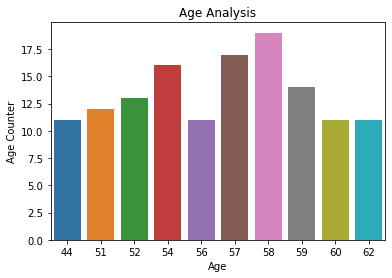

In [11]:
sns.barplot(x=df.age.value_counts()[:10].index, y = df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis')
plt.show

In [12]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

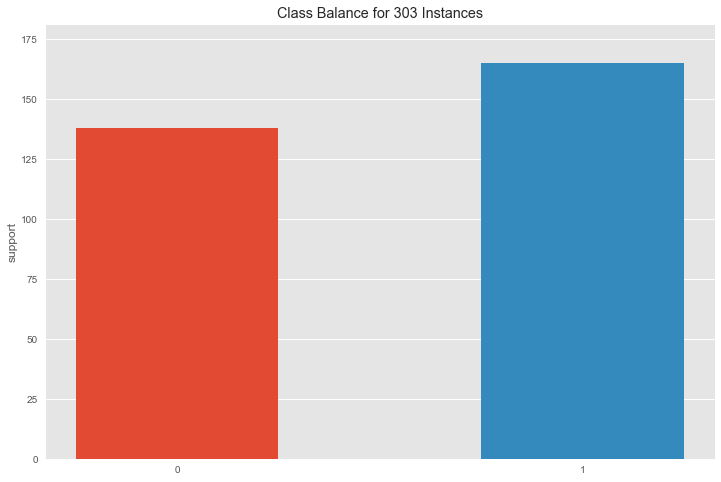

<AxesSubplot:title={'center':'Class Balance for 303 Instances'}, ylabel='support'>

In [17]:
viz = ClassBalance(label=[0,1]).fit(df.target)
viz.show()

In [18]:
df.shape

(303, 14)

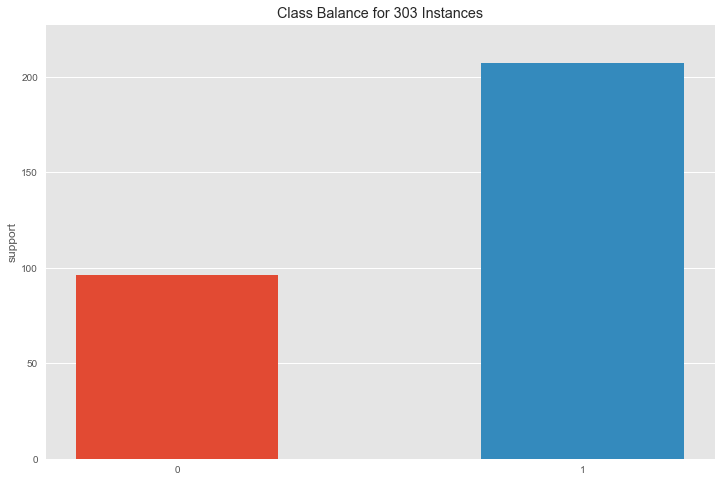

<AxesSubplot:title={'center':'Class Balance for 303 Instances'}, ylabel='support'>

In [19]:
viz = ClassBalance(label=['Female','Male']).fit(df.sex)
viz.show()

In [21]:
from sklearn.linear_model import LogisticRegression
X = df.loc[:,df.columns != 'target']
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)*100

85.24590163934425

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)*100

63.934426229508205

In [26]:
from sklearn.svm import SVC 
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)*100

68.85245901639344

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)*100

85.24590163934425

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [243]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)*100

88.52459016393442

In [246]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num= 10)]
max_features =['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,120,num =11)]
max_depth.append(None)
min_sample_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap =[True,False]

random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap' : bootstrap}



In [248]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=100,cv=3,verbose = 2, random_state = 0,n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.score(X_test,y_test)*100

Fitting 3 folds for each of 100 candidates, totalling 300 fits


85.24590163934425

In [249]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train)
print("XG boost accuracy : {:.2f}%".format(xg.score(X_test, y_test)*100))

ModuleNotFoundError: No module named 'xgboost'